#📌 Extracción

In [3]:
import pandas as pd

# URL del archivo JSON en GitHub (raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la URL
df = pd.read_json(url)

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [16]:
df = pd.json_normalize(df.to_dict(orient="records"))
print(df.head)

<bound method NDFrame.head of       customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1              

#🔧 Transformación

In [4]:
# Tipos de datos
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [17]:
# 3. Renombrar columnas para coincidir con el diccionario de datos
df = df.rename(columns={
    "customerID": "customerID",
    "Churn": "Churn",
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges.Monthly",
    "account.Charges.Total": "Charges.Total"
})


In [18]:
# 4. Conversión de numéricos
num_cols = ["tenure", "Charges.Monthly", "Charges.Total"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 5. Normalización de categorías (lowercase, strip espacios)
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "Churn"
]

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 6. Eliminar duplicados
df = df.drop_duplicates()

# 7. Comprobación final
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nTipos de datos:\n", df.dtypes)
print("\nEjemplo de dataset limpio:\n", df.head())

Valores nulos por columna:
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

Tipos de datos:
 customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract  

In [19]:
# Mostrar las filas donde Charges.Total es nulo
df[df["Charges.Total"].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,no,female,0,yes,yes,0,no,no phone service,dsl,...,yes,yes,yes,yes,no,two year,no,credit card (automatic),56.05,NaN
1775,2520-SGTTA,no,female,0,yes,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.00,NaN
1955,2775-SEFEE,no,male,0,no,yes,0,yes,yes,dsl,...,yes,no,yes,no,no,two year,yes,bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,no,male,0,yes,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,one year,yes,mailed check,19.70,NaN
2232,3115-CZMZD,no,male,0,no,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.25,NaN
2308,3213-VVOLG,no,male,0,yes,yes,0,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.35,NaN
2930,4075-WKNIU,no,female,0,yes,yes,0,yes,yes,dsl,...,yes,yes,yes,yes,no,two year,no,mailed check,73.35,NaN
3134,4367-NUYAO,no,male,0,yes,yes,0,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,NaN
3203,4472-LVYGI,no,female,0,yes,yes,0,no,no phone service,dsl,...,no,yes,yes,yes,no,two year,yes,bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,no,female,0,yes,yes,0,yes,no,dsl,...,yes,yes,no,yes,yes,two year,no,mailed check,80.85,NaN


In [20]:
# Reemplazar valores nulos en Charges.Total por 0
df["Charges.Total"] = df["Charges.Total"].fillna(0)

# Verificar que ya no haya nulos
print(df["Charges.Total"].isnull().sum())


0


In [22]:
# Crear una columna calculada
df["Charges.Calculado"] = df["Charges.Monthly"] * df["tenure"]

# Comparar con Charges.Total
df["Diferencia"] = df["Charges.Total"] - df["Charges.Calculado"]

# Mostrar algunos ejemplos
print(df[["customerID", "tenure", "Charges.Monthly", "Charges.Total", "Charges.Calculado", "Diferencia"]].head(15))

# Verificar cuántos registros tienen diferencia significativa (> 1 por redondeo)
inconsistentes = df[abs(df["Diferencia"]) > 1]
print("\nCantidad de registros inconsistentes:", len(inconsistentes))


    customerID  tenure  Charges.Monthly  Charges.Total  Charges.Calculado  \
0   0002-ORFBO       9            65.60         593.30             590.40   
1   0003-MKNFE       9            59.90         542.40             539.10   
2   0004-TLHLJ       4            73.90         280.85             295.60   
3   0011-IGKFF      13            98.00        1237.85            1274.00   
4   0013-EXCHZ       3            83.90         267.40             251.70   
5   0013-MHZWF       9            69.40         571.45             624.60   
6   0013-SMEOE      71           109.70        7904.25            7788.70   
7   0014-BMAQU      63            84.65        5377.80            5332.95   
8   0015-UOCOJ       7            48.20         340.35             337.40   
9   0016-QLJIS      65            90.45        5957.90            5879.25   
10  0017-DINOC      54            45.20        2460.55            2440.80   
11  0017-IUDMW      72           116.80        8456.75            8409.60   

In [23]:
# Crear columna Cuentas_Diarias
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

# Verificar
print(df[["customerID", "Charges.Monthly", "Cuentas_Diarias"]].head())


   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.186667
1  0003-MKNFE             59.9         1.996667
2  0004-TLHLJ             73.9         2.463333
3  0011-IGKFF             98.0         3.266667
4  0013-EXCHZ             83.9         2.796667


In [24]:
# 1. Convertir variables Yes/No en binarias (1/0)
binarias = [
    "Churn", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

for col in binarias:
    df[col] = df[col].map({"yes": 1, "no": 0})

# 2. Convertir género (male/female → 0/1)
df["gender"] = df["gender"].map({"female": 0, "male": 1})

# 3. Renombrar columnas clave para mejor comprensión
df = df.rename(columns={
    "tenure": "Meses_Contrato",
    "Charges.Monthly": "Gasto_Mensual",
    "Charges.Total": "Gasto_Total",
    "Cuentas_Diarias": "Gasto_Diario"
})

# 4. Verificar resultado
print(df.head())
print("\nTipos de datos:\n", df.dtypes)


   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  \
0  0002-ORFBO    0.0       0              0        1           1   
1  0003-MKNFE    0.0       1              0        0           0   
2  0004-TLHLJ    1.0       1              0        0           0   
3  0011-IGKFF    1.0       1              1        1           0   
4  0013-EXCHZ    1.0       0              1        1           0   

   Meses_Contrato  PhoneService  MultipleLines InternetService  ...  \
0               9             1            0.0             dsl  ...   
1               9             1            1.0             dsl  ...   
2               4             1            0.0     fiber optic  ...   
3              13             1            0.0     fiber optic  ...   
4               3             1            0.0     fiber optic  ...   

   StreamingTV  StreamingMovies        Contract  PaperlessBilling  \
0          1.0              0.0        one year                 1   
1          0.0            

In [26]:
# 1. Columnas binarias a limpiar
cols_binarias = [
    "Churn", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# 2. Rellenar NaN con 0
df[cols_binarias] = df[cols_binarias].fillna(0)

# 3. Convertir a enteros
df[cols_binarias] = df[cols_binarias].astype("int")

# 4. Redondear la diferencia
df["Diferencia"] = df["Diferencia"].round(2)

# 5. Verificar cambios
print(df[cols_binarias].dtypes)
print(df[cols_binarias].head())

Churn               int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object
   Churn  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0      0              0               0             1                 0   
1      0              1               0             0                 0   
2      1              0               0             0                 1   
3      1              0               0             1                 1   
4      1              0               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  
0            1            1                0  
1            0            0                1  
2            0            0                0  
3            0            1                1  
4            1            1                0  


#📊 Carga y análisis

In [27]:
# --- Estadísticas descriptivas de las variables numéricas ---
print("📊 Estadísticas numéricas:\n")
print(df.describe().T)   # Transpuesta para mayor legibilidad

# --- Mediana y desviación estándar adicionales ---
print("\n📌 Medianas:\n")
print(df.median(numeric_only=True))

print("\n📌 Desviaciones estándar:\n")
print(df.std(numeric_only=True))

# --- Distribución de variables categóricas ---
print("\n📊 Distribución de variables categóricas:\n")
for col in ["gender", "InternetService", "Contract", "PaymentMethod"]:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())


📊 Estadísticas numéricas:

                    count         mean          std         min         25%  \
Churn              7267.0     0.257190     0.437115    0.000000    0.000000   
gender             7267.0     0.505711     0.500002    0.000000    0.000000   
SeniorCitizen      7267.0     0.162653     0.369074    0.000000    0.000000   
Partner            7267.0     0.484106     0.499782    0.000000    0.000000   
Dependents         7267.0     0.300124     0.458343    0.000000    0.000000   
Meses_Contrato     7267.0    32.346498    24.571773    0.000000    9.000000   
PhoneService       7267.0     0.902711     0.296371    0.000000    1.000000   
MultipleLines      7267.0     0.421770     0.493876    0.000000    0.000000   
OnlineSecurity     7267.0     0.285950     0.451897    0.000000    0.000000   
OnlineBackup       7267.0     0.344571     0.475261    0.000000    0.000000   
DeviceProtection   7267.0     0.342782     0.474672    0.000000    0.000000   
TechSupport        7267.0

📊 Estadísticos descriptivos (numéricos):

       Meses_Contrato  Gasto_Mensual  Gasto_Total  Gasto_Diario
count     7267.000000    7267.000000  7267.000000   7267.000000
mean        32.346498      64.720098  2277.182035      2.157337
std         24.571773      30.129572  2268.648587      1.004319
min          0.000000      18.250000     0.000000      0.608333
25%          9.000000      35.425000   396.200000      1.180833
50%         29.000000      70.300000  1389.200000      2.343333
75%         55.000000      89.875000  3778.525000      2.995833
max         72.000000     118.750000  8684.800000      3.958333

📊 Estadísticos por grupo de Churn:

       Meses_Contrato  Gasto_Mensual  Gasto_Total
Churn                                            
0           37.321045      61.354224  2535.263977
1           17.979133      74.441332  1531.796094

Mediana por grupo:

       Meses_Contrato  Gasto_Mensual  Gasto_Total
Churn                                            
0                37.0   

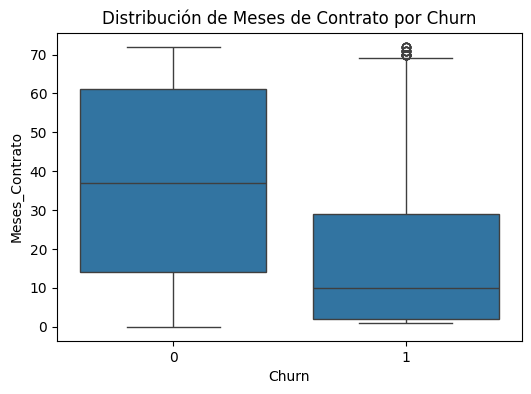

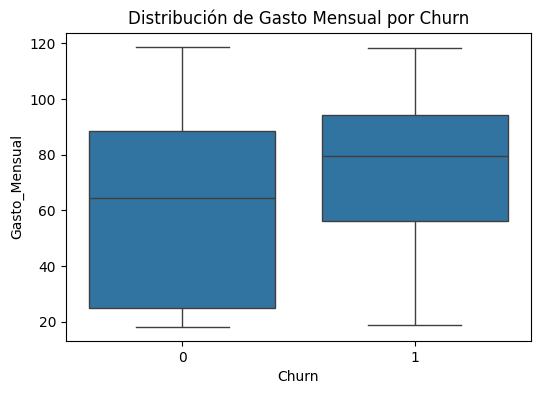

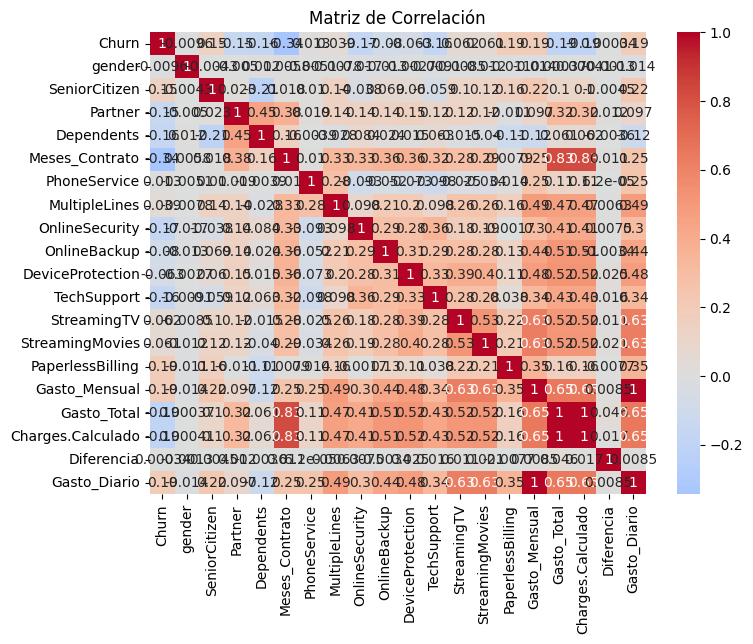


🔥 Tasa de churn general: 25.72%


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Estadísticos generales
# =====================
print("📊 Estadísticos descriptivos (numéricos):\n")
print(df[["Meses_Contrato", "Gasto_Mensual", "Gasto_Total", "Gasto_Diario"]].describe())

# =====================
# 2. Comparación Churn vs No Churn
# =====================
print("\n📊 Estadísticos por grupo de Churn:\n")
print(df.groupby("Churn")[["Meses_Contrato", "Gasto_Mensual", "Gasto_Total"]].mean())
print("\nMediana por grupo:\n")
print(df.groupby("Churn")[["Meses_Contrato", "Gasto_Mensual", "Gasto_Total"]].median())

# =====================
# 3. Tasas de churn por categoría
# =====================
def churn_rate(col):
    return df.groupby(col)["Churn"].mean().sort_values(ascending=False)

categorical_cols = ["Contract", "PaymentMethod", "InternetService",
                    "OnlineSecurity", "TechSupport", "Partner", "Dependents"]

for col in categorical_cols:
    print(f"\n📌 Tasa de churn por {col}:")
    print(churn_rate(col))

# =====================
# 4. Visualizaciones
# =====================

# Boxplot: Meses de contrato vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="Meses_Contrato", data=df)
plt.title("Distribución de Meses de Contrato por Churn")
plt.show()

# Boxplot: Gasto mensual vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="Gasto_Mensual", data=df)
plt.title("Distribución de Gasto Mensual por Churn")
plt.show()

# Heatmap de correlaciones (numéricas)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

# =====================
# 5. Tasa de churn general
# =====================
churn_rate_total = df["Churn"].mean()
print(f"\n🔥 Tasa de churn general: {churn_rate_total:.2%}")


/tmp/ipython-input-176980598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


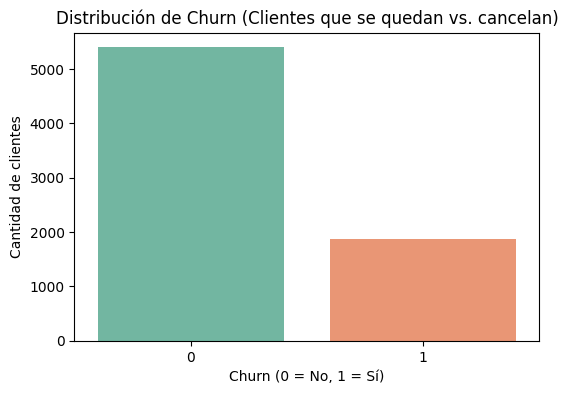

📊 Porcentaje de clientes por estado de churn:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


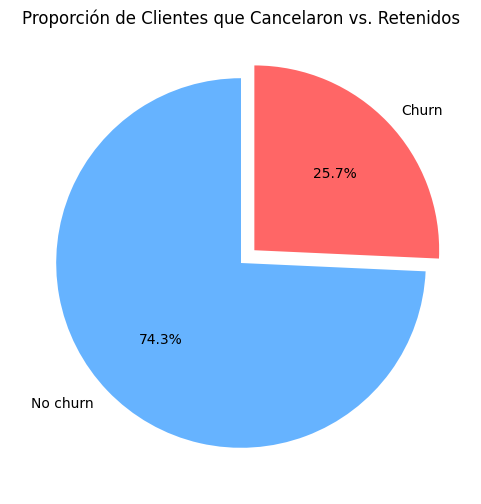

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Distribución de Churn
# =====================

# Conteo absoluto
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de Churn (Clientes que se quedan vs. cancelan)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

# Porcentaje de churn
churn_counts = df["Churn"].value_counts(normalize=True) * 100
print("📊 Porcentaje de clientes por estado de churn:")
print(churn_counts)

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=["No churn", "Churn"], autopct="%1.1f%%",
        startangle=90, colors=["#66b3ff","#ff6666"], explode=(0,0.1))
plt.title("Proporción de Clientes que Cancelaron vs. Retenidos")
plt.show()


/tmp/ipython-input-3447705777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


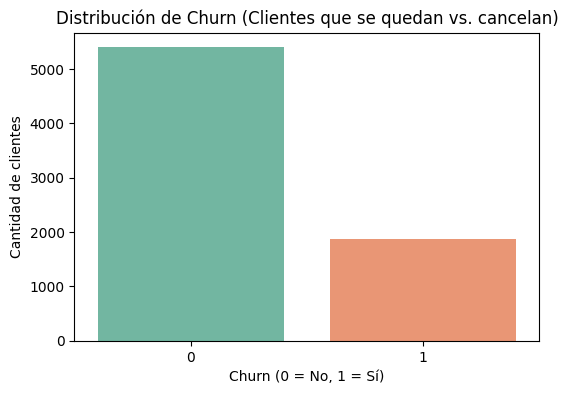

📊 Porcentaje de clientes por estado de churn:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


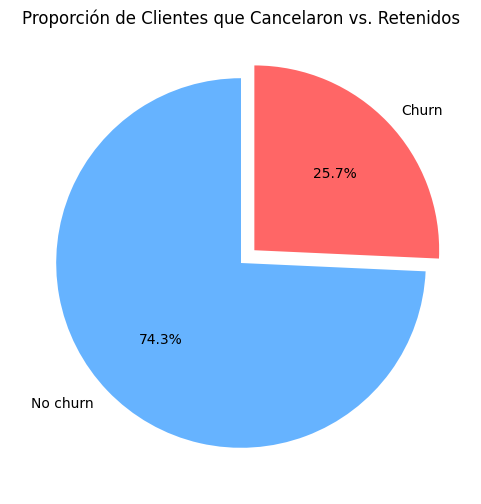

/tmp/ipython-input-3447705777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")



📌 Análisis de gender:

- 0: 26.14% churn (3592 clientes)
- 1: 25.31% churn (3675 clientes)
👉 Mayor churn en: 0 (26.14%)
👉 Menor churn en: 1 (25.31%)
--------------------------------------------------


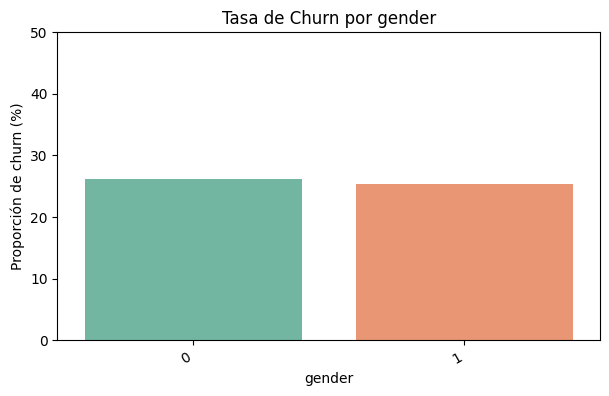

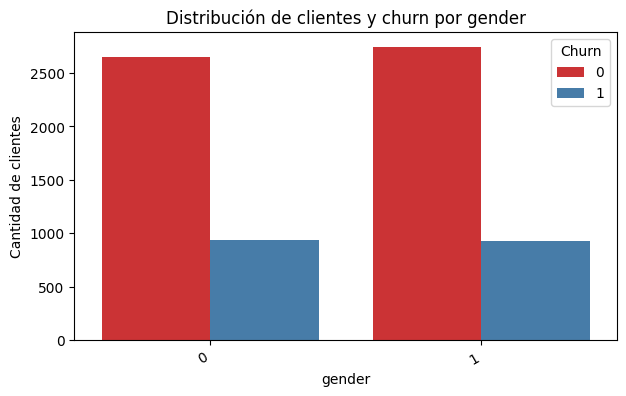


📌 Análisis de Contract:

- month-to-month: 41.32% churn (4005 clientes)
- one year: 10.93% churn (1519 clientes)
- two year: 2.75% churn (1743 clientes)
👉 Mayor churn en: month-to-month (41.32%)
👉 Menor churn en: two year (2.75%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


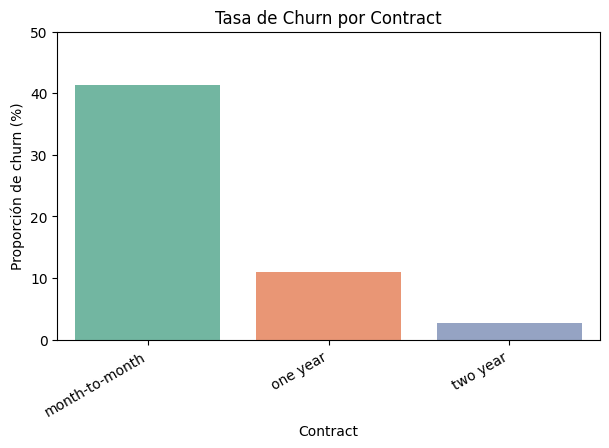

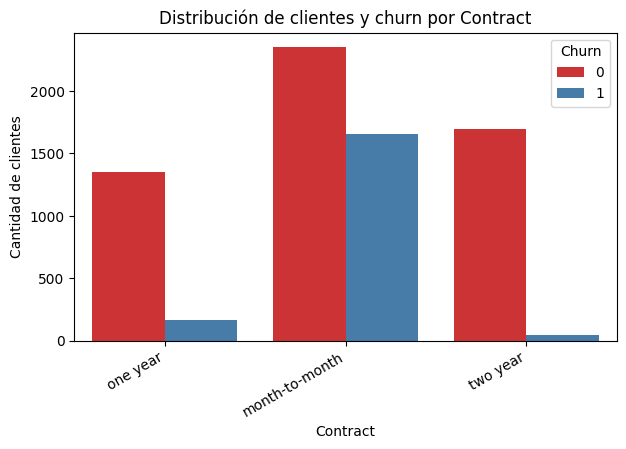


📌 Análisis de PaymentMethod:

- electronic check: 43.80% churn (2445 clientes)
- mailed check: 18.50% churn (1665 clientes)
- bank transfer (automatic): 16.24% churn (1589 clientes)
- credit card (automatic): 14.80% churn (1568 clientes)
👉 Mayor churn en: electronic check (43.80%)
👉 Menor churn en: credit card (automatic) (14.80%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


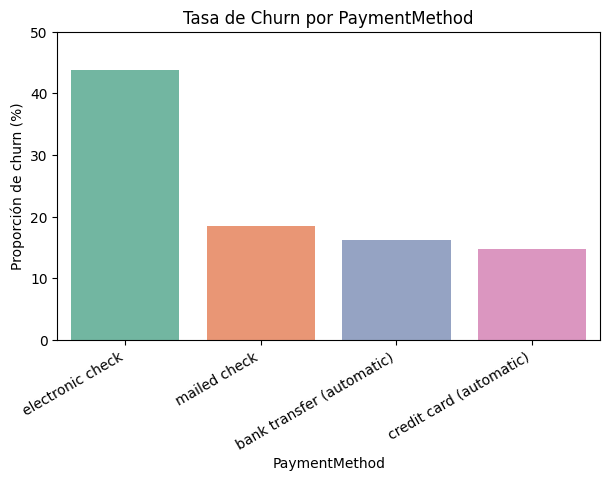

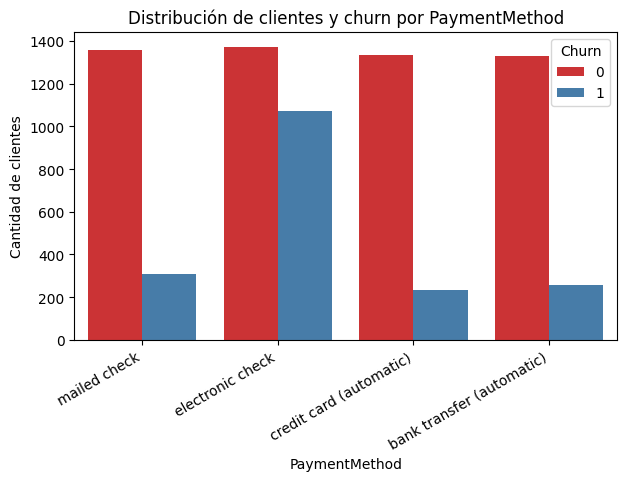


📌 Análisis de InternetService:

- fiber optic: 40.56% churn (3198 clientes)
- dsl: 18.45% churn (2488 clientes)
- no: 7.15% churn (1581 clientes)
👉 Mayor churn en: fiber optic (40.56%)
👉 Menor churn en: no (7.15%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


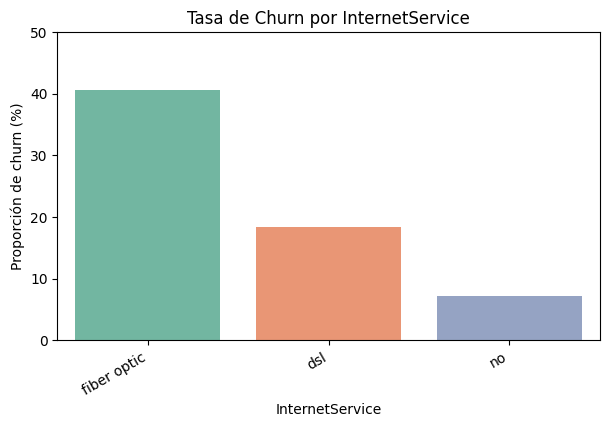

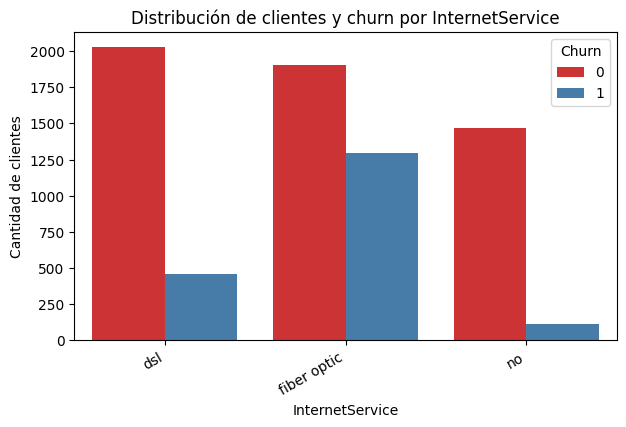


📌 Análisis de OnlineSecurity:

- No tiene OnlineSecurity: 30.33% churn (5189 clientes)
- Sí tiene OnlineSecurity: 14.20% churn (2078 clientes)
👉 Mayor churn en: No tiene OnlineSecurity (30.33%)
👉 Menor churn en: Sí tiene OnlineSecurity (14.20%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


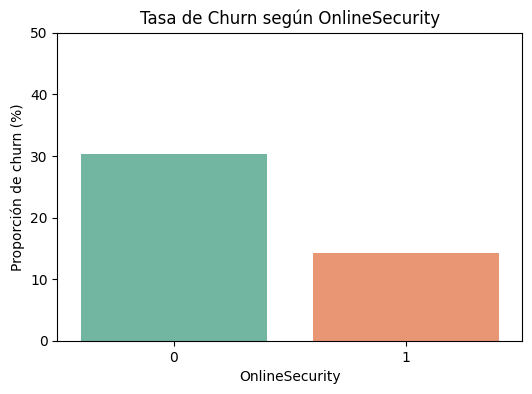


📌 Análisis de TechSupport:

- No tiene TechSupport: 30.20% churn (5163 clientes)
- Sí tiene TechSupport: 14.73% churn (2104 clientes)
👉 Mayor churn en: No tiene TechSupport (30.20%)
👉 Menor churn en: Sí tiene TechSupport (14.73%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


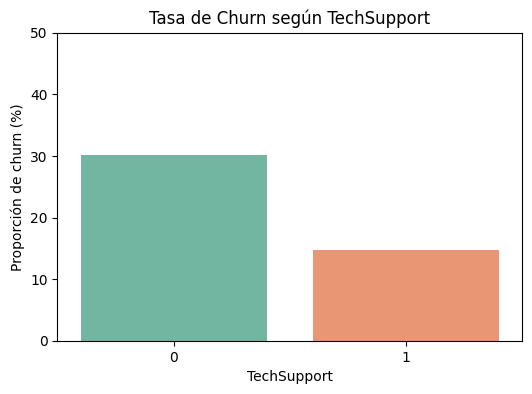


📌 Análisis de OnlineBackup:

- No tiene OnlineBackup: 28.26% churn (4763 clientes)
- Sí tiene OnlineBackup: 20.89% churn (2504 clientes)
👉 Mayor churn en: No tiene OnlineBackup (28.26%)
👉 Menor churn en: Sí tiene OnlineBackup (20.89%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


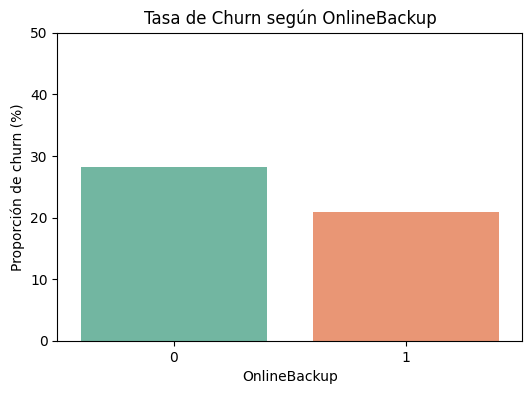


📌 Análisis de DeviceProtection:

- No tiene DeviceProtection: 27.72% churn (4776 clientes)
- Sí tiene DeviceProtection: 21.88% churn (2491 clientes)
👉 Mayor churn en: No tiene DeviceProtection (27.72%)
👉 Menor churn en: Sí tiene DeviceProtection (21.88%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


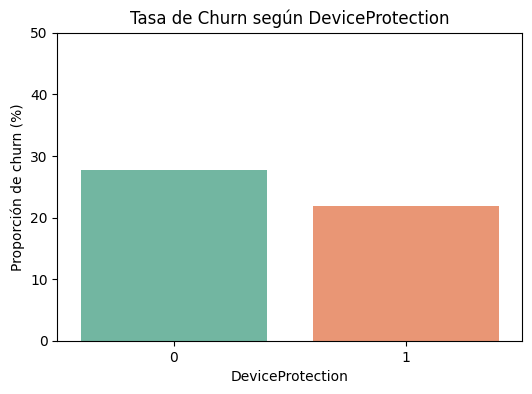


📌 Análisis de StreamingTV:

- Sí tiene StreamingTV: 29.18% churn (2790 clientes)
- No tiene StreamingTV: 23.56% churn (4477 clientes)
👉 Mayor churn en: Sí tiene StreamingTV (29.18%)
👉 Menor churn en: No tiene StreamingTV (23.56%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


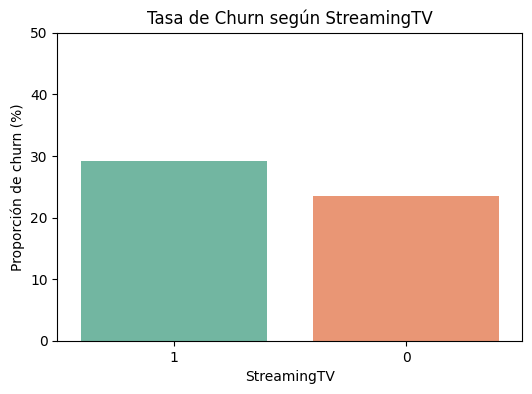


📌 Análisis de StreamingMovies:

- Sí tiene StreamingMovies: 29.05% churn (2816 clientes)
- No tiene StreamingMovies: 23.61% churn (4451 clientes)
👉 Mayor churn en: Sí tiene StreamingMovies (29.05%)
👉 Menor churn en: No tiene StreamingMovies (23.61%)
--------------------------------------------------


/tmp/ipython-input-3447705777.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")


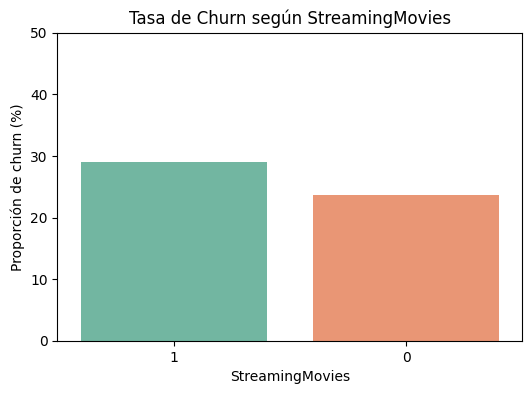

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Distribución general de churn
# =====================

# Conteo absoluto
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de Churn (Clientes que se quedan vs. cancelan)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

# Porcentaje de churn
churn_counts = df["Churn"].value_counts(normalize=True) * 100
print("📊 Porcentaje de clientes por estado de churn:")
print(churn_counts)

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=["No churn", "Churn"], autopct="%1.1f%%",
        startangle=90, colors=["#66b3ff","#ff6666"], explode=(0,0.1))
plt.title("Proporción de Clientes que Cancelaron vs. Retenidos")
plt.show()


# =====================
# 2. Distribución por variables categóricas
# =====================
categorical_cols = ["gender", "Contract", "PaymentMethod", "InternetService"]

for col in categorical_cols:
    print(f"\n📌 Análisis de {col}:\n")

    # Calcular tasa de churn
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False) * 100
    counts = df[col].value_counts()

    # Mostrar en consola
    for categoria, tasa in churn_rate.items():
        total = counts[categoria]
        print(f"- {categoria}: {tasa:.2f}% churn ({total} clientes)")

    max_cat = churn_rate.idxmax()
    min_cat = churn_rate.idxmin()
    print(f"👉 Mayor churn en: {max_cat} ({churn_rate[max_cat]:.2f}%)")
    print(f"👉 Menor churn en: {min_cat} ({churn_rate[min_cat]:.2f}%)")
    print("-"*50)

    # Gráfico de barras (tasa de churn)
    plt.figure(figsize=(7,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")
    plt.title(f"Tasa de Churn por {col}")
    plt.ylabel("Proporción de churn (%)")
    plt.xlabel(col)
    plt.xticks(rotation=30, ha="right")
    plt.ylim(0, 50)
    plt.show()

    # Gráfico de conteo segmentado
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set1")
    plt.title(f"Distribución de clientes y churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad de clientes")
    plt.xticks(rotation=30, ha="right")
    plt.show()


# =====================
# 3. Distribución por servicios extra (variables binarias)
# =====================
binary_services = ["OnlineSecurity", "TechSupport", "OnlineBackup", "DeviceProtection",
                   "StreamingTV", "StreamingMovies"]

for col in binary_services:
    print(f"\n📌 Análisis de {col}:\n")

    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False) * 100
    counts = df[col].value_counts()

    for categoria, tasa in churn_rate.items():
        total = counts[categoria]
        texto = "No tiene" if categoria == 0 else "Sí tiene"
        print(f"- {texto} {col}: {tasa:.2f}% churn ({total} clientes)")

    max_cat = churn_rate.idxmax()
    min_cat = churn_rate.idxmin()
    texto_max = "No tiene" if max_cat == 0 else "Sí tiene"
    texto_min = "No tiene" if min_cat == 0 else "Sí tiene"
    print(f"👉 Mayor churn en: {texto_max} {col} ({churn_rate[max_cat]:.2f}%)")
    print(f"👉 Menor churn en: {texto_min} {col} ({churn_rate[min_cat]:.2f}%)")
    print("-"*50)

    # Gráfico de barras
    plt.figure(figsize=(6,4))
    sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, palette="Set2")
    plt.title(f"Tasa de Churn según {col}")
    plt.ylabel("Proporción de churn (%)")
    plt.xlabel(col)
    plt.ylim(0, 50)
    plt.show()


/tmp/ipython-input-3170932361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


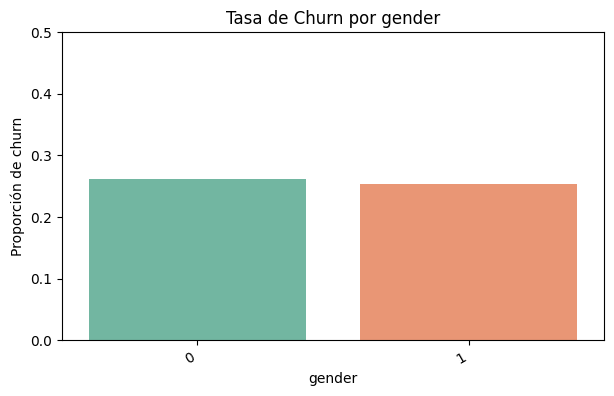

/tmp/ipython-input-3170932361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


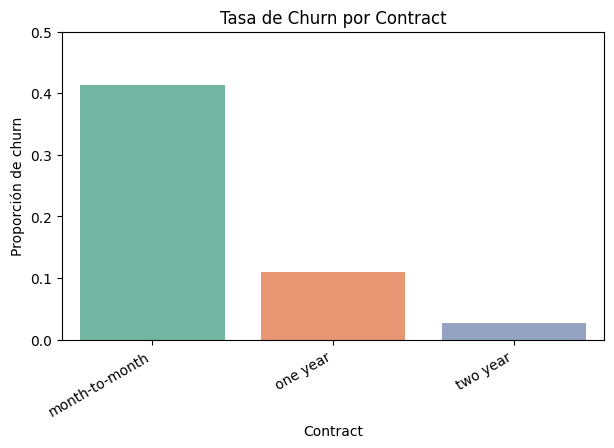

/tmp/ipython-input-3170932361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


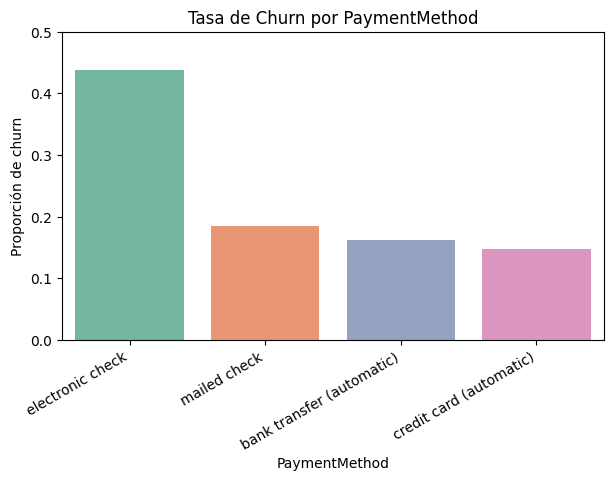

/tmp/ipython-input-3170932361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")


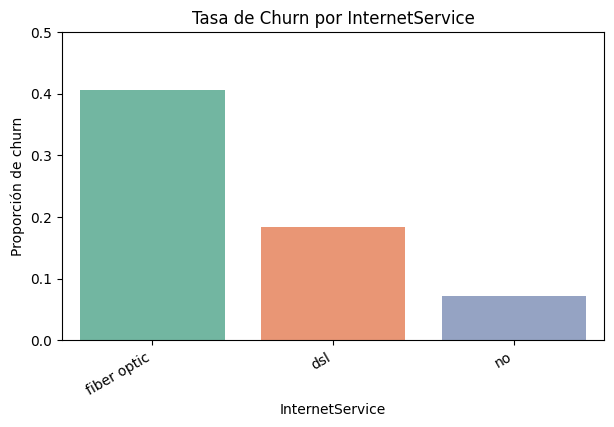

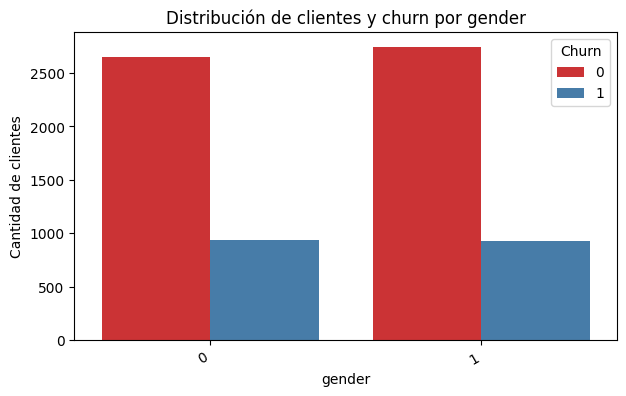

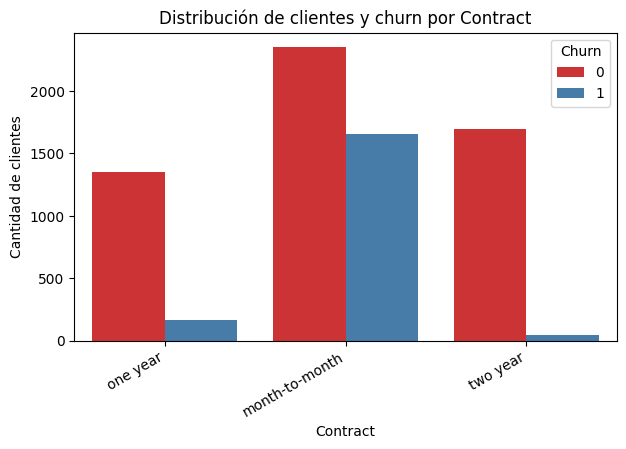

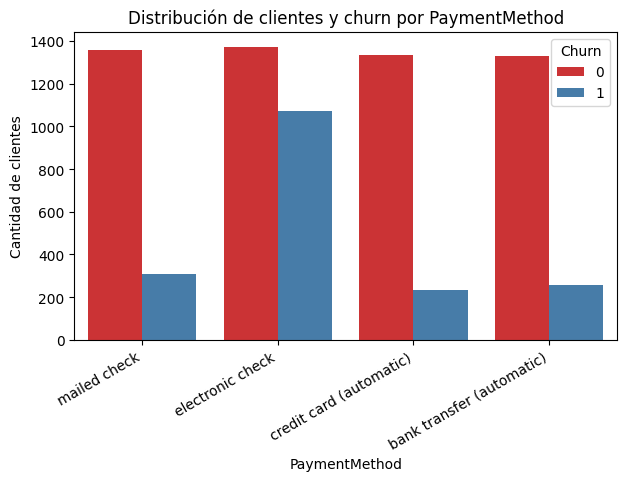

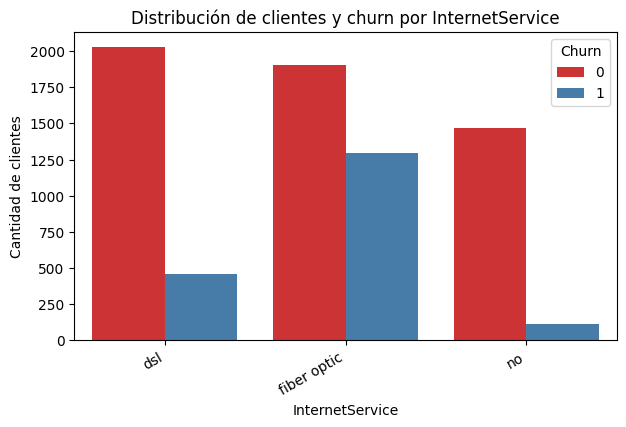

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Distribución de churn por variables categóricas
# =====================

categorical_cols = ["gender", "Contract", "PaymentMethod", "InternetService"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False)

    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")
    plt.title(f"Tasa de Churn por {col}")
    plt.ylabel("Proporción de churn")
    plt.xlabel(col)
    plt.xticks(rotation=30, ha="right")
    plt.ylim(0, 0.5)  # para que todas se vean en la misma escala
    plt.show()

# =====================
# Conteo absoluto segmentado
# =====================
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set1")
    plt.title(f"Distribución de clientes y churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad de clientes")
    plt.xticks(rotation=30, ha="right")
    plt.show()


📊 Estadísticos descriptivos por grupo de churn:


--- Meses_Contrato ---
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
--------------------------------------------------

--- Gasto_Mensual ---
        count       mean        std    min    25%    50%      75%     max
Churn                                                                    
0      5398.0  61.354224  31.105006  18.25  25.10  64.50  88.6375  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.2000  118.35
--------------------------------------------------

--- Gasto_Total ---
        count         mean          std    min       25%       50%       75%  \
Churn                                                                          
0      5398.0  2535.263977  2330.802193   0.00  564.3625  1663.62

/tmp/ipython-input-650315127.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


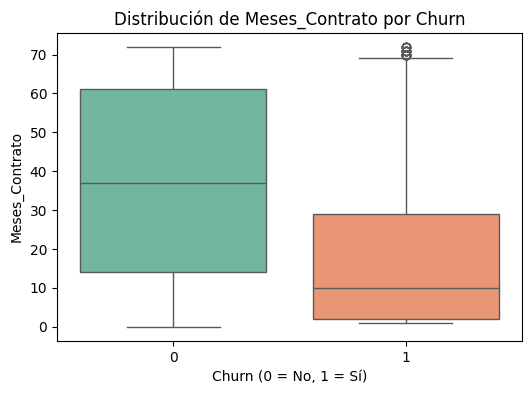

/tmp/ipython-input-650315127.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


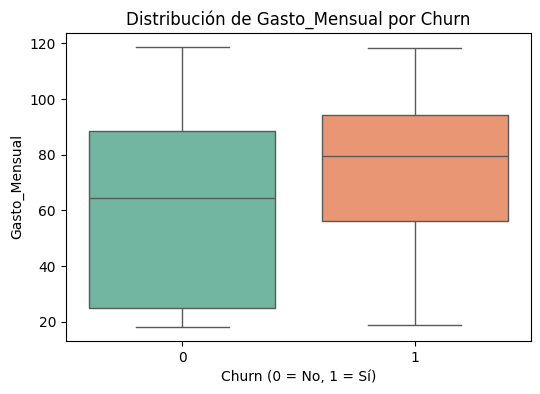

/tmp/ipython-input-650315127.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


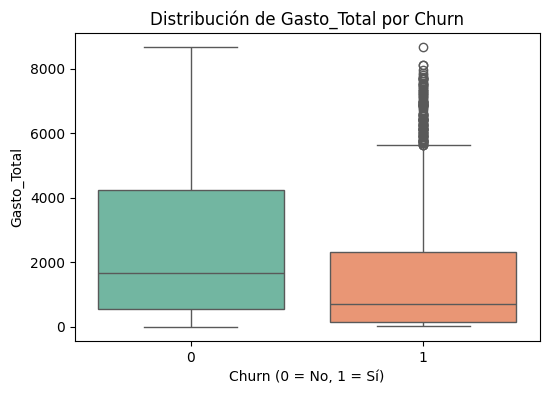

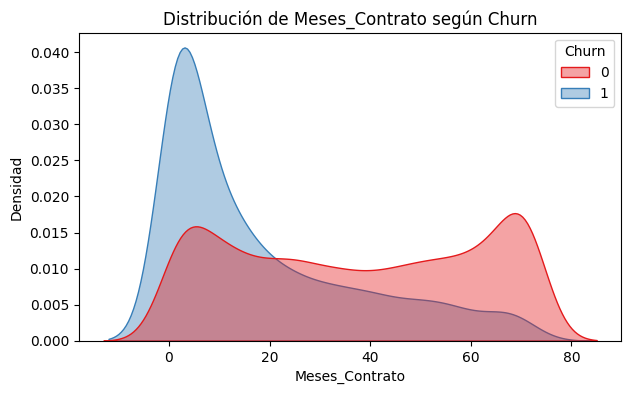

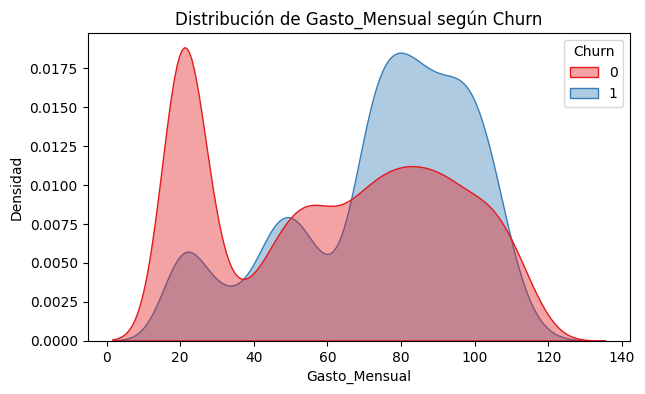

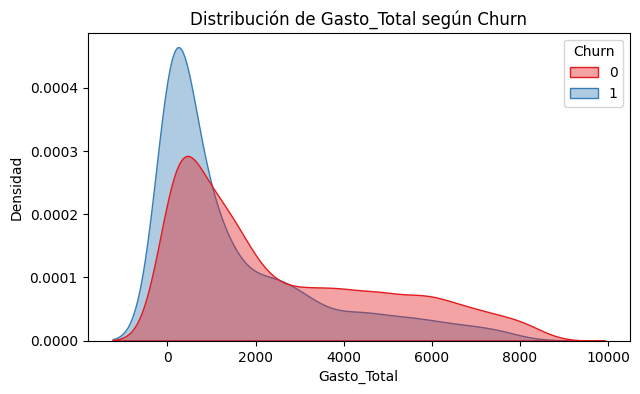

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Estadísticos descriptivos por grupo
# =====================
num_cols = ["Meses_Contrato", "Gasto_Mensual", "Gasto_Total"]

print("📊 Estadísticos descriptivos por grupo de churn:\n")
for col in num_cols:
    print(f"\n--- {col} ---")
    print(df.groupby("Churn")[col].describe())
    print("-"*50)


# =====================
# 2. Boxplots comparando churn vs no churn
# =====================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
    plt.title(f"Distribución de {col} por Churn")
    plt.xlabel("Churn (0 = No, 1 = Sí)")
    plt.ylabel(col)
    plt.show()


# =====================
# 3. Histogramas/KDE comparando distribuciones
# =====================
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True, common_norm=False, alpha=0.4, palette="Set1")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()


#📄Informe final

📑 Informe Final – Análisis de Evasión de Clientes (Churn)
1. Introducción

El presente análisis tiene como objetivo comprender los factores que explican la evasión de clientes (Churn) en la empresa TelecomX. La evasión de clientes es uno de los problemas más críticos en el sector de telecomunicaciones, ya que impacta directamente en los ingresos recurrentes y en el valor de vida del cliente (CLV).

La empresa registra una tasa de churn del 25.7%, lo que significa que aproximadamente 1 de cada 4 clientes abandona el servicio. El objetivo de este estudio fue identificar patrones de comportamiento y características de los clientes con mayor propensión a cancelar, para orientar estrategias de retención efectivas.

2. Limpieza y Tratamiento de Datos

El dataset original contenía 7,267 registros de clientes con información demográfica, de contrato, servicios contratados y facturación.

Se realizaron los siguientes pasos:

Normalización y aplanamiento de columnas anidadas (customer, phone, internet, account).

Estandarización de categorías (minúsculas, sin espacios).

Conversión de variables:

Yes/No → binario (1/0).

Género → male/female → (1/0).

Conversión de numéricos: tenure, Charges.Monthly, Charges.Total.

Tratamiento de nulos: en Charges.Total (rellenado con 0 y cálculo alternativo).

Eliminación de duplicados y verificación de consistencia.

Se crearon nuevas variables como:

Meses_Contrato (antigüedad).

Gasto_Mensual, Gasto_Total, Gasto_Diario.

3. Análisis Exploratorio de Datos
- Distribución de churn

74.3% permanecen.

25.7% cancelan.


- Variables categóricas

Contract:

Mes a mes → 41% churn (riesgo alto).

Un año → 11%.

Dos años → 2.7%.

PaymentMethod:

Electronic check → 44% churn.

Automáticos (tarjeta/banco) → 15–16%.

InternetService:

Fibra óptica → 40.6% churn.

DSL → 18%.

Sin internet → 7%.

Servicios adicionales (protección/soporte):

Sin seguridad online → 30% churn.

Con seguridad → 14%.

Sin soporte técnico → 30% vs. 14% con soporte.

Entretenimiento:

Con streaming TV/Movies → 29% churn.

Sin streaming → 23%.

Demografía (género):

Mujeres → 26.1%.

Hombres → 25.3%. (No es un factor relevante.)

- Variables numéricas

Meses de contrato:

Cancelan: mediana 10 meses.

No cancelan: mediana 37 meses.
Se van temprano, antes de consolidar la relación.

Gasto mensual:

Cancelan: mediana 80 USD.

No cancelan: mediana 65 USD.
Los que pagan más al mes se van más rápido.

Gasto total:

Cancelan: mediana 704 USD.

No cancelan: mediana 1664 USD.
El valor de vida es mucho menor en clientes que cancelan.

Visualizaciones: boxplots y distribuciones (KDE) reforzaron estas diferencias.

4.  Conclusiones e Insights

La evasión se concentra en clientes con contratos mensuales.

Método de pago electronic check es un fuerte predictor de churn.

Clientes con fibra óptica presentan más cancelaciones que DSL, lo que sugiere problemas de servicio o de precios.

Servicios adicionales (soporte, seguridad, backup) actúan como factores protectores, reduciendo el churn a la mitad.

Clientes que cancelan suelen tener gasto mensual alto y poca antigüedad, lo que refleja insatisfacción temprana por costos.

El género y la demografía no tienen un peso significativo.

5. Recomendaciones

Fomentar contratos de largo plazo con beneficios y descuentos (migrar clientes de mes a mes hacia 1 año o 2 años).

Reducir la fricción del pago electrónico → incentivar métodos automáticos (tarjeta/crédito/débito) con promociones.

Revisar la oferta de fibra óptica, evaluando precios, estabilidad del servicio y soporte técnico.

Ofrecer bundles de valor agregado (ejemplo: soporte técnico + seguridad online incluidos en planes premium).

Programa de retención temprana:

Identificar clientes de < 12 meses y gasto mensual alto.

Contactarlos con ofertas, beneficios o encuestas de satisfacción antes de que cancelen.

Optimizar la oferta de streaming → evaluar percepción de valor, posibles alianzas o mejoras de calidad.